In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

/home/neriberman/miniconda3/envs/ground_shake/lib/python3.13/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
from ground_motion_qh import extract_pairs

# create a random time sequence

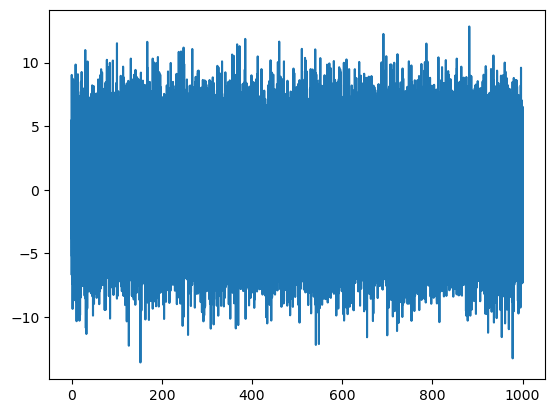

In [3]:
N = 100_000

waveform = np.random.normal(0, 3, N)
time_vector = np.linspace(0, 1000, N)
plt.plot(time_vector, waveform)

In [4]:
selected_times = np.sort(np.random.choice(time_vector, 300, replace=False))

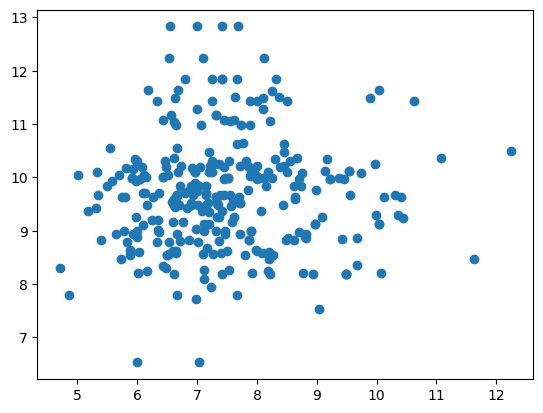

In [6]:
a_minus_vector, a_plus_vector = extract_pairs.waveform_to_max_amp_pairs(
    selected_times,
    waveform,
    time_vector,
    # tw_minus=TW_MINUS,
    # tw_plus=TW_PLUS,
    # tw_buffer=TW_BUFFER,
)

plt.scatter(a_minus_vector, a_plus_vector)

In [7]:
def create_tw_minus_slices(
    tau_vec,
    time_vector,  # should be sorted
    tw_minus,
    ):
  tw_minus_ends = np.searchsorted(time_vector, tau_vec, side='left') + 1
  tw_minus_starts = np.searchsorted(time_vector, tau_vec - tw_minus, side='right')
  slices_list = [slice(tw_minus_starts[i], tw_minus_ends[i]) for i in range(len(tw_minus_ends))]
  return slices_list

def create_tw_buffer_slices(
    tau_vec,
    time_vector,  # should be sorted
    tw_buffer,
    ):
  tw_buffer_starts = np.searchsorted(time_vector, tau_vec, side='left')
  tw_buffer_ends = np.searchsorted(time_vector, tau_vec + tw_buffer, side='left')
  slices_list = [slice(tw_buffer_starts[i], tw_buffer_ends[i]) for i in range(len(tw_buffer_ends))]
  return slices_list

def create_tw_plus_slices(
    tau_vec,
    time_vector,  # should be sorted
    tw_plus,
    tw_buffer,
    ):
  tw_plus_starts = np.searchsorted(time_vector, tau_vec + tw_buffer, side='left')
  tw_plus_ends = np.searchsorted(time_vector, tau_vec + tw_plus + tw_buffer, side='left')
  slices_list = [slice(tw_plus_starts[i], tw_plus_ends[i]) for i in range(len(tw_plus_ends))]
  return slices_list

In [8]:
TW_MINUS = 1
TW_BUFFER = 1
TW_PLUS = 10

tw_minus_slices = create_tw_minus_slices(
    selected_times,
    time_vector,
    tw_minus=TW_MINUS,
    )
tw_plus_slices = create_tw_plus_slices(
    selected_times,
    time_vector,
    tw_plus=TW_PLUS,
    tw_buffer=TW_BUFFER,
    )

In [9]:
tw_plus_slices

[slice(np.int64(124), np.int64(1124), None),
 slice(np.int64(240), np.int64(1240), None),
 slice(np.int64(399), np.int64(1399), None),
 slice(np.int64(482), np.int64(1482), None),
 slice(np.int64(814), np.int64(1814), None),
 slice(np.int64(856), np.int64(1856), None),
 slice(np.int64(1249), np.int64(2249), None),
 slice(np.int64(1522), np.int64(2522), None),
 slice(np.int64(1805), np.int64(2805), None),
 slice(np.int64(1881), np.int64(2881), None),
 slice(np.int64(1971), np.int64(2971), None),
 slice(np.int64(2271), np.int64(3271), None),
 slice(np.int64(2512), np.int64(3512), None),
 slice(np.int64(2736), np.int64(3736), None),
 slice(np.int64(2859), np.int64(3859), None),
 slice(np.int64(3103), np.int64(4103), None),
 slice(np.int64(3578), np.int64(4578), None),
 slice(np.int64(3652), np.int64(4652), None),
 slice(np.int64(5178), np.int64(6178), None),
 slice(np.int64(5418), np.int64(6418), None),
 slice(np.int64(5515), np.int64(6515), None),
 slice(np.int64(5621), np.int64(6621), N

In [10]:
def create_max_amp_pairs(
    waveform,
    tw_minus_slices,
    tw_plus_slices,
    ):
  a_minus_vector = []
  a_plus_vector = []
  for i in range(len(tw_minus_slices)):
    try:
      max_of_minus = np.max(waveform[tw_minus_slices[i]])
    except ValueError:
      max_of_minus = np.nan
    try:
      max_of_plus = np.max(waveform[tw_plus_slices[i]])
    except ValueError:
      max_of_plus = np.nan
    a_minus_vector.append(max_of_minus)
    a_plus_vector.append(max_of_plus)
  return np.array(a_minus_vector), np.array(a_plus_vector)


In [11]:
a_minus_vector, a_plus_vector = create_max_amp_pairs(
    waveform,
    tw_minus_slices,
    tw_plus_slices,
    )

In [12]:
a_minus_vector = []
a_plus_vector = []
for i, t in enumerate(selected_times):
  try:
    max_of_minus = np.max(waveform[tw_minus_slices[i]])
  except ValueError:
    max_of_minus = np.nan
  try:
    max_of_plus = np.max(waveform[tw_plus_slices[i]])
  except ValueError:
    max_of_plus = np.nan
  a_minus_vector.append(max_of_minus)
  a_plus_vector.append(max_of_plus)
a_minus_vector = np.array(a_minus_vector)
a_plus_vector = np.array(a_plus_vector)
  

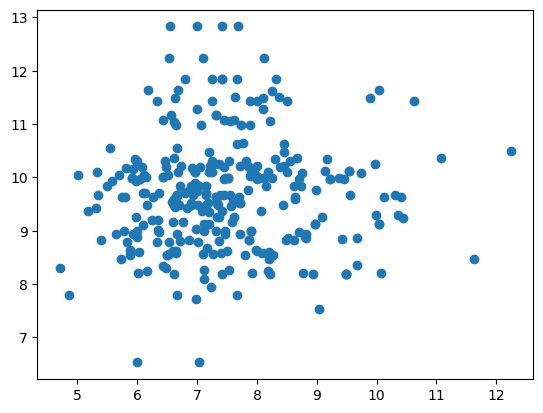

In [13]:
plt.scatter(a_minus_vector, a_plus_vector)

In [ ]:
def extract_max_amps_from_single_timestamp(
    t0,
    waveform, # should be sorted according to time_vector
    time_vector,  # should be sorted
    tw_minus,
    tw_buffer,
    tw_plus,
    ):
  slice_tw_minus = np.searchsorted(time_vector, t0 - tw_minus)
  slice_tw_minus = np.searchsorted(time_vector, t0 - tw_minus)
